# Insider Trading Proof of Concept

Hannah Lee

### **Goals:** 
- Identify potential trading on insider information for Shopify Inc: TSX (SHOP.TO)
- Investigate suspicious traders against related names of Shopify using means like social media 


### **Summary:** 
My goal for this proof of concept was to perform a **security based investigation** for trading occuring on insider information. For this demo I investigated potential insider trading for Shopify (SHOP.TO). 

#### PHASE 1
The first step was to create a score that identified dates where SHOP.TO's performance was highly volatile. I am assuming that dates with higher than usual volatility is a result of positive or negative news. The date I found with the highest risk score for SHOP.TO was February 12, 2018.

After identifying the highest risk date, I then cross checked to see if there was a news release that could influence the SHOP.TO's share price. I found that on February 12, 2018, Shopify announced that they were chosen to run Ontario's online cannibus store. This confirmed that there was a relevant news release that caused the price volatility in the share. 

I then pulled trading data of accounts who bought shares of SHOP.TO within 1 month of the investigated date and who sold their SHOP.TO shares on February 12 for a large total.

Once I identified the traders who met this criteria, I investigated their trading activity for abnormal behavior. This included trading in a stock sector they didn't normally trade in, higher than usual trading activity of the stock in question,  higher than usual purchase quantity of the stock in question, trading on a dormant account, and consecutive trades of the stock in question.


#### PHASE 2
Once I identified traders with abnormal trading pattern, I then looked into the related names of Shopify by examining names registered on SEDI. After identifying the SEDI names, I then looked for any obvious connection to the investigated traders, such as same name or same last name. I then investigated the SEDI social media accounts against the traders social media accounts to look a relationship . 

#### PHASE 3 (Bonus)
In this Phase, I touch on other methods of identifying potential insider traders that could be used outside of the scope asked.


____________________

# PHASE 1

Identify potential trading on insider information for Shopify Inc: TSX (SHOP.TO)


In [2]:
#Libraries

import numpy as np
import pandas as pd
import os as os

import matplotlib.pyplot as plt

## PART 1: Identify high risk dates

 **Logic:**
1. Identify % PnL change per day
2. Flag whether the change between days is positive or negative
3. Flag when the pattern of change between days (pos/neg) remains the same
4. Take the cumulative sum of the percentage change when the pattern of change between days remains the same
5. If the percentage change is >0.06 then flag to investigate
    
    *[note: 0.06 was chosen as a parameter to identify high percentage change. This parameter can be adjusted]*

6. Create a risk score that scores high volatility in the market
7. Identify the dates with the highest risk score
8. Investigate clients who sold on high risk dates and bought shares within one month before 

________________


### One year of Shopify Inc. (TSX) data pulled from Yahoo Finance


In [5]:
shop = pd.read_csv('SHOP.TO historical data.csv', sep=',', header='infer')
shop.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-28,78.489998,80.660004,78.470001,78.870003,78.870003,214200
1,2017-03-01,79.989998,80.120003,78.800003,79.550003,79.550003,174700
2,2017-03-02,80.010002,81.150002,79.500000,80.080002,80.080002,143400
3,2017-03-03,80.230003,80.989998,79.290001,80.650002,80.650002,127200
4,2017-03-06,80.629997,80.629997,78.620003,79.550003,79.550003,100200


In [6]:
shop['Symbol']='SHOP.TO'
shop['Volume']=shop.Volume/1000
shop = shop.drop(['High','Low','Adj Close','Open'],1)

# Percentage Change
shop['Percent_PnL'] = (shop.Close-shop.Close.shift())/shop.Close.shift()
shop['PosNeg'] = np.where(shop.Percent_PnL >0, 'Pos','Neg')
shop['Pattern'] = shop.groupby((shop.PosNeg!=shop.PosNeg.shift()).cumsum()).cumcount()

# Only keep records where the change pattern is consistent within 1 record
shop = shop[shop.Pattern !=0]

# Counters to help calculate Cumulative Total Change
shop['Counter'] = np.where(shop.Pattern==1,1,0)
shop['Counter']= shop.Counter.cumsum()

# Calculate Total Cumulative Change within a similar incline/decline pattern
shop['Total_Change']=shop.groupby(['Counter'])['Percent_PnL'].cumsum()

# Flag when a cumulative change is > abs(0.06)
shop['Investigate']=np.where(shop.Total_Change>abs(0.06),1,0)

# Remove days that aren't being flagged to investigate
shop = shop[shop.Investigate !=0]

# Create a risk score based on: Total_Change, Volume, and Change Pattern
shop['Score']= (shop.Total_Change*shop.Volume)/shop.Pattern

# Sort to see dates with the highest score
shop = shop.sort_values(['Score'],ascending=0)

shop = shop.drop(['Counter','Investigate'],1)


_______________
We narrowed the dataframe down to 17 days to investigate with ranking order of risk score.

**Note:** Risk score takes into account Total Change, Volume, and Change Pattern. Dates with higher total change and volume, and a lower change pattern number will have a higher risk score. This should reflect a sudden jumps in PnL and high volume sold.  


** Days with higher risk score should be investigated first:** Let's investigate February 12, 2018

In [7]:
shop

,Date,Close,Volume,Symbol,Percent_PnL,PosNeg,Pattern,Total_Change,Score
240,2018-02-12,161.050003,687.2,SHOP.TO,0.070954,Pos,1,0.070954,48.759292
44,2017-05-02,113.940002,801.7,SHOP.TO,0.074196,Pos,2,0.096853,38.823705
123,2017-08-24,133.500000,683.8,SHOP.TO,0.038183,Pos,4,0.115780,19.792540
128,2017-08-31,138.000000,650.6,SHOP.TO,0.008624,Pos,3,0.062774,13.613602
229,2018-01-26,159.070007,346.9,SHOP.TO,0.030914,Pos,2,0.076874,13.333742
122,2017-08-23,128.589996,492.5,SHOP.TO,0.038021,Pos,3,0.077596,12.738725
198,2017-12-11,133.800003,393.5,SHOP.TO,0.033205,Pos,3,0.091011,11.937639
50,2017-05-10,127.150002,398.0,SHOP.TO,0.036859,Pos,3,0.085959,11.403857
135,2017-09-12,146.690002,468.3,SHOP.TO,0.025733,Pos,3,0.065666,10.250484
184,2017-11-21,140.850006,468.5,SHOP.TO,0.013309,Pos,3,0.061904,9.667371


______________________________________________________________________________________________________________________________

## Relevant News Release

[February 12, 2017: SHOP.TO News Release](http://www.cbc.ca/news/canada/ottawa/ontario-shopify-marijuana-online-shopping-1.4531228)
> * *The Ontario Government has inked a deal to use Shopify Inc.'s ecommerce platform for cannibus sales online and instores as part of its plan to be the province's sole distributor of legal recreational marijuana.* 



______________________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________________

## PART 2: Identify traders who sold on February 12, 2018

**Logic:**
1. Identify traders who sold on February 12, 2018
2. Identify traders who purchased SHOP.TSX within the last month
3. Investigate traders who meet these criteria and sold for a large total of SHOP.TSX
_____________________
### February 12, 2018 SHOP.TO Trade Data [Mock Data]

In [8]:
trd = pd.read_csv('SHOP.TO trades Feb 12.csv', sep=',', header='infer')
trd.head()

# note: portfolio_percentage  = how much SHOP.TO makes up of the entire account portfolio 

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


,account_id,date,recent_purchase,recent_same_stock_purchase,first_name,last_name,country,state_province,city,stock_name,stock_symbol,stock_market,stock_sector,stock_industry,transaction_type,price,quantity,portfolio_percentage,total
0,100000,2018-02-12,2017-06-05,2017-05-20,Deedee,Woolacott,Canada,Ontario,Gananoque,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,buy,157.33,76,6.70,11957.08
1,100001,2018-02-12,2017-05-28,2017-04-11,Berke,Skerme,Canada,Saskatchewan,Saskatoon,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,157.05,52,1.37,8166.60
2,100002,2018-02-12,2017-09-18,2017-03-02,Micaela,Immings,Canada,Quebec,Forestville,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,159.39,47,1.21,7491.33
3,100003,2018-02-12,2017-06-03,2017-06-15,Rachele,Oxlee,Canada,Northwest Territories,Norman Wells,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,159.87,44,4.03,7034.28
4,100004,2018-02-12,2017-04-04,2017-08-30,Gayel,Risborough,Canada,Saskatchewan,Prince Albert,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,157.00,43,2.77,6751.00


In [9]:
# Only keep records where the account is selling
trd = trd[trd.transaction_type=="sell"]

# Keep only records where seller bought SHOP.TO shares within the 31 days
trd['Date_Diff'] = (pd.to_datetime(trd.date)-pd.to_datetime(trd.recent_same_stock_purchase)).dt.days
trd = trd[trd.Date_Diff<=31]

# Sort by portfolio percentage
trd = trd.sort_values(['total'],ascending=0)

# Return number of records
len(trd.index)

84


_____________________________
We went from 2000 trades to investigate to 84.

**We can now take a list of account_id's to investigate**: Let's investigate the top 4 account_ids in further detail.

In [10]:
trd.head(4)

,account_id,date,recent_purchase,recent_same_stock_purchase,first_name,last_name,country,state_province,city,stock_name,stock_symbol,stock_market,stock_sector,stock_industry,transaction_type,price,quantity,portfolio_percentage,total,Date_Diff
674,100674,2018-02-12,2018-02-05,2018-02-05,Zachary,Scuderi,Canada,Ontario,Lambton Shores,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,157.47,310,20.12,48815.70,7
6,100006,2018-02-12,2018-02-08,2018-02-08,Jenn,Im,Canada,Quebec,Maniwaki,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,156.52,239,38.45,37408.28,4
1883,101883,2018-02-12,2018-01-31,2018-01-31,Hannah,Lee,Canada,Newfoundland and Labrador,Bonavista,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,162.19,99,27.24,16056.81,12
944,100944,2018-02-12,2018-01-25,2018-01-20,Rowe,Steenson,Canada,Quebec,Château-Richer,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,161.13,99,6.54,15951.87,23


______________________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________________

## PART 3: Investigate traders 

**Logic:**
1. Pull last three months of trade data for account id's who sold on February 12
2. Investigate different measures to look for suspicious activity
    - Trading anomalies (Trading in an unusual sector)
    - Large purchases of SHOP.TO
    - Accumulation of stock (Large purchases & Frequent trading activity of SHOP.TO)
    - Consecutive purchases
    - Trading SHOP.TO on an inactive account
____________
    

### Investigating id 100674 (Zachary Scuderi): Trading anomolies 

In [11]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 100674]
mon = mon.groupby(['stock_sector','transaction_type','account_id'])['total'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'total_sum', 'count':'num_purchases'}, inplace=True)
mon = mon[mon.transaction_type=="buy"]

* Zachary Scuderi only purchased and sold one Technology sector share (SHOP.TO) in the last three 3 months of trading.
* This purchase was made 7 days before selling on February 12. 

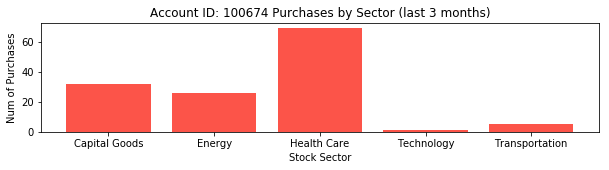

In [16]:
plt.bar(mon.stock_sector,mon.num_purchases, color ='#FC5449')
plt.title("Account ID: 100674 Purchases by Sector (last 3 months)")
plt.xlabel("Stock Sector")
plt.ylabel("Num of Purchases")
plt.rc('figure',figsize=(10,2))

### Investigating id 100674 (Zachary Scuderi): Large purchases of investigated stock 

In [17]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 100674]
mon = mon[mon.transaction_type=="buy"]
mon = mon.groupby(['stock_symbol','account_id'])['quantity'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'quantity_sum', 'count':'num_purchases'}, inplace=True)


* Zachary Scuderi purchased an extremely high quantity of SHOP.TO shares compared to other securities in the last three months of trading.

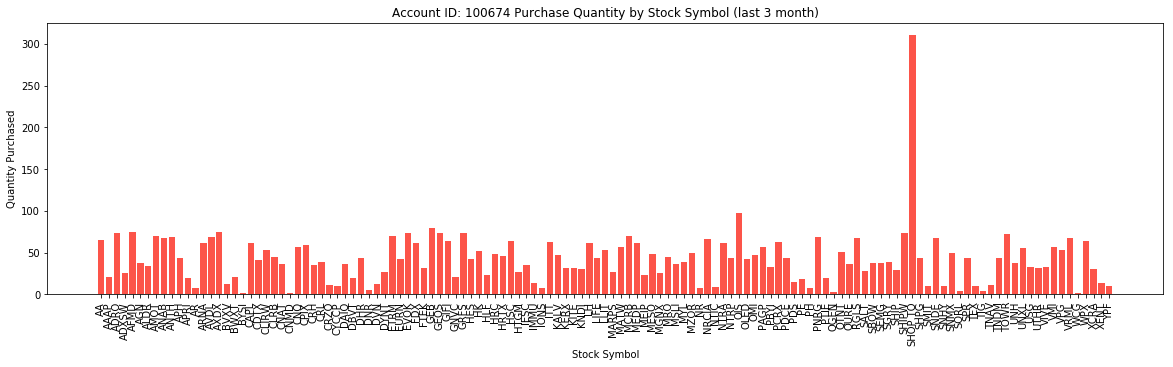

In [19]:
plt.bar(mon.stock_symbol, mon.quantity_sum, color = '#FC5449')
plt.title("Account ID: 100674 Purchase Quantity by Stock Symbol (last 3 month)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=90)
plt.ylabel("Quantity Purchased")
plt.rc('figure',figsize=(20,5))

______________________________________________________________________________________________________________________________

### Investigating id 100006 (Jenn Im): Trading anomolies

In [20]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')
mon = mon[mon.account_id == 100006]

mon = mon.groupby(['stock_sector','transaction_type','account_id'])['total'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'total_sum', 'count':'num_purchases'}, inplace=True)
mon = mon[mon.transaction_type=="buy"]

* There doesn't seem to be any unusual purchases of different stock sectors within Jenn Im's 3 month trading history.        

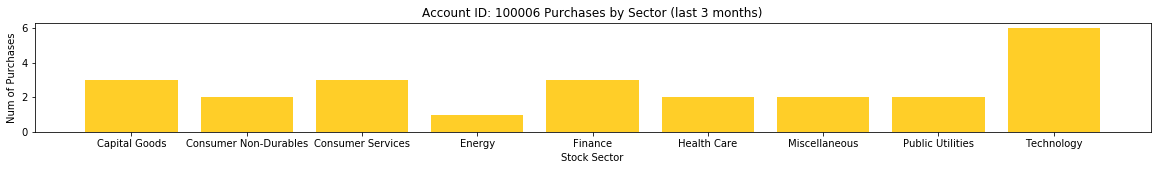

In [23]:
plt.bar(mon.stock_sector,mon.num_purchases, color='#FFCE28')
plt.title("Account ID: 100006 Purchases by Sector (last 3 months)")
plt.xlabel("Stock Sector")
plt.ylabel("Num of Purchases")
plt.rc('figure',figsize=(20,2))

        
### Investigating id 100006 (Jenn Im):  Accumulation of stock (high purchase quantity)

* Because we observed no trading anomalies over the 3 month period, let's narrow into Jenn Im's trading behavior within 1 month of February 12.

        

In [24]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 100006]
mon = mon[mon.transaction_type=="buy"]
mon = mon[(mon.date>'2018-01-11') & (mon.date<='2018-02-12')]

mon = mon.groupby(['stock_symbol','account_id'])['quantity'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'quantity_sum', 'count':'num_purchases'}, inplace=True)


* Jenn Im purchased a high quantity of SHOP.TO shares compared to other securities in the last month of trading. 


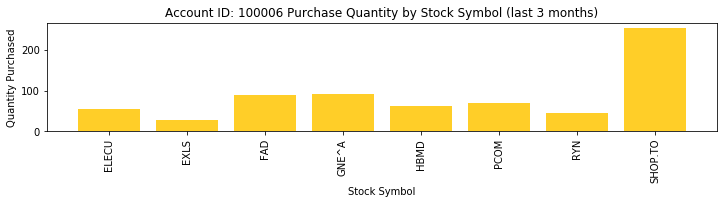

In [27]:
plt.bar(mon.stock_symbol, mon.quantity_sum, color='#FFCE28')
plt.title("Account ID: 100006 Purchase Quantity by Stock Symbol (last 3 months)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=90)
plt.ylabel("Quantity Purchased")
plt.rc('figure',figsize=(12,2))

### Investigating id 100006 (Jenn Im): Frequent trade activity of inspected stock 



In [28]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 100006]
mon = mon[(mon.date>'2018-01-11') & (mon.date<='2018-02-12')]

mon = mon.groupby(['stock_symbol','account_id'])['quantity'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'quantity_sum', 'count':'num_transactions'}, inplace=True)


* Can see that the number of transactions for SHOP.TO is high compared to other securities. This indicates Jenn Im frequently traded SHOP.TO in the last month of trading. 

* This leads us to conclude that she accumulated a large quantity of shares over multiple purchases since she was frequently trading and purchased an overall large quantity of shares within the last month.

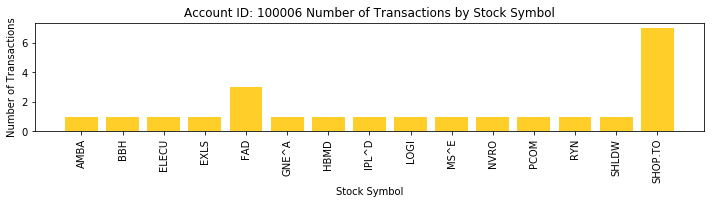

In [31]:
plt.bar(mon.stock_symbol, mon.num_transactions, color='#FFCE28')
plt.title("Account ID: 100006 Number of Transactions by Stock Symbol")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=90)
plt.ylabel("Number of Transactions")
plt.rc('figure',figsize=(12,2))

### Investigating id 100006 (Jenn Im): Consecutive purchases

* Can see that Jenn Im made 4 consecutive purchases of SHOP.TO without buying other stocks.

*[Consecutive purchase = Purchasing SHOP.TO multiple times without purchasing any other stock inbetween]*

In [32]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')
mon = mon[mon.account_id == 100006]

mon = mon[(mon.date>'2018-01-11') & (mon.date<='2018-02-12')]
mon['Pattern'] =  pd.to_numeric(mon.groupby((mon.stock_symbol!=mon.stock_symbol.shift(-1)).cumsum()).cumcount())
mon['Pattern'] = np.where(mon.Pattern.shift(1)!=0, mon.Pattern.shift()+1, mon.Pattern)
mon['Pattern'] = np.where(np.isnan(mon.Pattern), 0, mon.Pattern)
mon = mon[mon.Pattern!=0]
    
mon

,date,account_id,first_name,last_name,country,state_province,city,stock_name,stock_symbol,stock_market,stock_sector,stock_industry,transaction_type,price,quantity,total,Pattern
434,2018-01-31,100006,Jenn,Im,Canada,Quebec,Maniwaki,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,buy,150.20,54,8110.8,1.0
442,2018-02-01,100006,Jenn,Im,Canada,Quebec,Maniwaki,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,buy,156.27,70,10938.9,2.0
470,2018-02-06,100006,Jenn,Im,Canada,Quebec,Maniwaki,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,buy,140.71,70,9849.7,3.0
478,2018-02-07,100006,Jenn,Im,Canada,Quebec,Maniwaki,SHOPIFY INC (TSX),SHOP.TO,TSX,Technology,Retail internet,sell,157.85,10,1578.5,4.0


_________________________

### Investigating id 101883 (Rowe Steenson): Trade frequency 

* Can see that Rowe Steenson only made **3 transactions** within the last 3 months.

In [33]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')
mon = mon[mon.account_id == 100944]

#Return number of records (transactions)
len(mon.index)

3

* Examining the 3 transactions, we can see that 2 of the 3 were relating to buying and selling SHOP.TO shares.

In [34]:
mon = mon.groupby(['transaction_type','stock_symbol','account_id',])['total'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'total_sum', 'count':'total_count'}, inplace=True)

mon

,transaction_type,stock_symbol,account_id,total_sum,total_count
0,buy,SHOP.TO,100944,14798.52,1
1,sell,DRRX,100944,559.80,1
2,sell,SHOP.TO,100944,15951.87,1


_________

### Investigating id 101883 (Hannah Lee): Trading anomolies:


In [35]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')
mon = mon[mon.account_id == 101883]

mon = mon.groupby(['stock_sector','transaction_type','account_id'])['total'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'total_sum', 'count':'num_purchases'}, inplace=True)
mon = mon[mon.transaction_type=="buy"]

* There doesn't seem to be any unusual purchases of different stock sectors within Hannah Lee's 3 month trading history.     

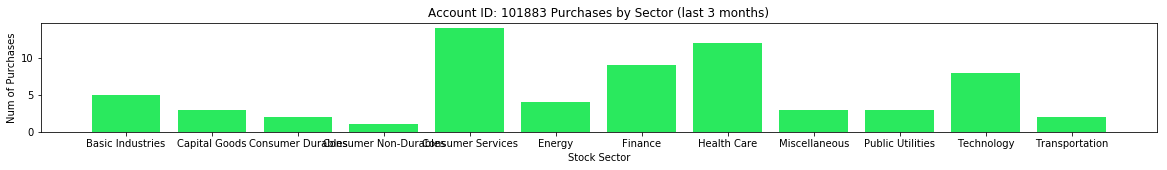

In [38]:
plt.bar(mon.stock_sector,mon.num_purchases, color='#2AE95E')
plt.title("Account ID: 101883 Purchases by Sector (last 3 months)")
plt.xlabel("Stock Sector")
plt.ylabel("Num of Purchases")
plt.rc('figure',figsize=(20,2))

        
### Investigating id 101883 (Hannah Lee):  Accumulation of stock (high purchase quantity)

* Because we observed no trading anomalies over the 3 month period, let's narrow into Hannah Lee's trading behavior within 1 month of February 12.

        

In [39]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 101883]
mon = mon[mon.transaction_type=="buy"]
mon = mon[(mon.date>'2018-01-11') & (mon.date<='2018-02-12')]

mon = mon.groupby(['stock_symbol','account_id'])['quantity'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'quantity_sum', 'count':'num_purchases'}, inplace=True)

* Doesn't seem that Hannah Lee purchased a high quantity of SHOP.TO shares compared to other securities in the last month of trading.


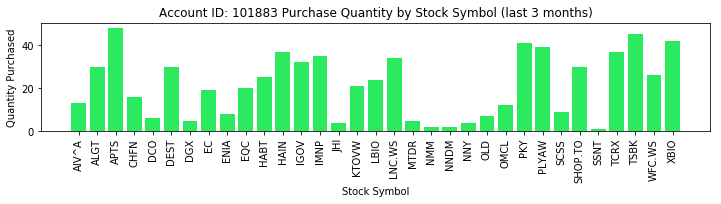

In [42]:
plt.bar(mon.stock_symbol, mon.quantity_sum, color='#2AE95E')
plt.title("Account ID: 101883 Purchase Quantity by Stock Symbol (last 3 months)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=90)
plt.ylabel("Quantity Purchased")
plt.rc('figure',figsize=(12,2))

### Investigating id 101883 (Hannah Lee): Frequent trade activity of inspected stock 



In [43]:
mon = pd.read_csv('3_months_trading.csv', sep=',', header='infer')

mon = mon[mon.account_id == 101883]

mon = mon[(mon.date>'2018-01-11') & (mon.date<='2018-02-12')]
mon = mon.groupby(['stock_symbol','account_id'])['quantity'].agg(['sum','count']).reset_index()
mon.rename(columns={'sum':'quantity_sum', 'count':'num_transactions'}, inplace=True)

* Doesn't seem that Hannah Lee had higher than usual trade activity on SHOP.TO in the last month of trading.

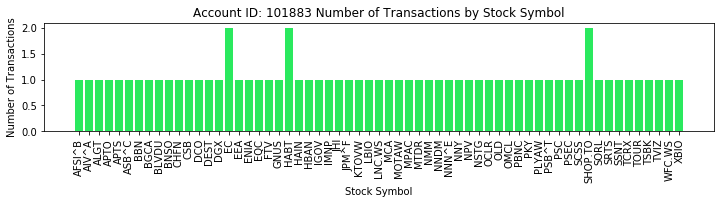

In [45]:
plt.bar(mon.stock_symbol, mon.num_transactions, color='#2AE95E')
plt.title("Account ID: 101883 Number of Transactions by Stock Symbol")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=90)
plt.ylabel("Number of Transactions")
plt.rc('figure',figsize=(12,2))

____________
## Overview

**Zachary Scuderi:** Should be investigated due to unusual trading activity in a different stock sector

* Only invested in one Technology Sector stock (SHOP.TO) in the last three months of trading
* Purchased a high quantity of SHOP.TO shares compared to other securities within the last three months of trading

**Jenn Im:** Should be investigated due to frequent trading activity of SHOP.TO and purchase of a large quantity of SHOP.TO shares in a short period of time, as well as consecutive purchases of SHOP.TO. 
* Didn't discover any unusual trading anomoalies
* Purchased a high quantity of SHOP.TO shares compared to other stocks in the last month of trading
* Frequent trading activity for SHOP.TO compared to other stocks in the last month of trading
* Made 4 consecutive purchases of SHOP.TO without buying other stocks inbetween of trading

**Rowe Steenson:** Should be investigated due to SHOP.TO trading activity on a relatively dormant account
* Only made 3 transactions in the last 3 months of trading
    * 2 of the three transactions were buying and selling SHOP.TO shares

**Hannah Lee:** No evidence of needing to investigate
* Didn't discover any unusual trading anomalies 
* Didn't purchase an unusual quantity of SHOP.TO shares in the last month of trading
* Usual trading activity for SHOP.TO compared to other stocks in the last month of trading





____________________

______________

_______________

# Phase 2

Investigating suspicious traders against related names of Shopify Inc.

**Traders to Investigate:**
1. Zachary Scuderi
2. Jenn Im
3. Rowe Steenson

## PART 1: Cross check account names against SEDI filing for related names

__________________

### Shopify SEDI registered names

* Can see that our investigated names are not on the SEDI list. (We could confirm this on a large scale with an inner join of the two list of names). With data on the insider's relatives, we could cross check against those names as well.  

In [27]:
import pandas as pd
sedi = pd.read_excel("SEDI names.xlsx")
sedi

,Insider Name
0,Robert Gerard Ashe
1,Steven Alan Collins
2,Harley Michael Finkelstein
3,Brittany Jean Forsyth
4,Joseph Andrew Frasca
5,Gail Faye Goodman
6,Russell Norman Jones
7,Jean-Michel Lemieux
8,David William Lennie
9,Jeremy Seth Levine


## PART 2: Cross check account names against SEDI social media accounts
*LinkedIn and Twitter*

### LinkedIn API

I started by attempting to pull LinkedIn API with the code below, but I found that I was only allowed to pull my own profile data. After doing some further research, I learned that LinkedIn restricted their open API in May 2015 so that users can only:
* Represent their own professional identity
* Post certifications directly to their profile
* Share professional content 

All other APIs would require developers to become a part of the LinekdIn partnership program.

[Click here for more information](https://developer.linkedin.com/blog/posts/2015/developer-program-changes)

In [28]:
# libraries
import linkedin
from linkedin import linkedin

# API access codes
API_KEY = "77isv628eoepgy"
API_SECRET = "mtU1xct8oxVaJT3v"
RETURN_URL = "https://localhost:80"

# get authentication code
authentication = linkedin.LinkedInAuthentication(API_KEY, API_SECRET, RETURN_URL)
print (authentication.authorization_url)
application = linkedin.LinkedInApplication(authentication) #copy and paste the link into a browser

# Find the code in the configured link ---- http://localhost:80/?code=xxxxxxxxxxxxxxxxxxxxxxxxx&state=xxxxxxxxxxxxxxxxxx
# NOTE: this authentication code will time out
authentication.authorization_code="AQQj-lLGwlCXhm5b-VI1ymMe7FU7M_HTEq7SS-RuJqbH3NOVnY_D-aC4czhSS_9ufhQ9BYZc9FWNSUyycGhlPQS-VMqTEpJihGCvmfGl4Y747W2z080cs5OUjFlsDJEkS-TWmL76QaeVHKNLQZqURxf9SSjeSw"

# Get the access token
# NOTE: This will need to be redone when the authentication code times out
authentication.get_access_token()

application = linkedin.LinkedInApplication(token="AQVq6XXrWG_YwvP_zqnaMF8b569PDP--LLZXbSWlMHOXyQ57i0tn0GoU6ooiJMx-0Icns_bulhCbUH2OjB2QzxfQymA_vRTftNT59joNCMftFgii2P133KL7C4xPiEYFyFfqtZqUm8rw9q2G3--OLoJcikdHNoXaIOyMZEoRVhWY-jaWbpKYPV59iSadWa9mf37-qSo1SkzL6NykiR7vbO8SUjQUiQ8t1tkdgnQuwgQU0_jJMBrhtrYu7xyTtgSspD0n-wB2kV1rzJjx2CZedzhqIffGUc_N6dXUI1XdZubnLbjKvcUGSFmRWQRCW5h-poWHNLZYz4SMtIYhWcWHAvnYAo-AAQ")

############ Information that call be pulled 

#Get the connected account's profile summary and list of connections
application.get_profile
application.get_connections

# Search for people/company based on implemented parameters
application.search_profile
application.search_company

#Display company profile based on a name or an id
application.search_companies(company_ids=[1035])

# Search across LinkedIn's job postings
application.search_job

# Read and interact with LinkedIn's groups functionality
application.get_group




AttributeError: module 'linkedin' has no attribute 'LinkedInAuthentication'

### Twitter API

**Logic:**
1. Pull list of twitter handles SEDI name is following
2. Pull list of twitter handles investigated account is following
3. Check if they follow each other
4. Check if they follow similar people to see if they have similar social circles

Let's investigate Brittany Forsyth who is the SVP of HR for Shopify.
Link to her twitter: [@BritForsyth](https://twitter.com/BritForsyth)

Because Jenn Im is a fashion blogger and Shopify is an e-commerce store, we'll investigate her first. Link to her twitter: [@imjennim](https://twitter.com/imjennim)


In [35]:
import tweepy
import time


access_token = "962768029691064320-k1DN34VcIcpqfEQRH05OLdq6KykyhAo"
access_secret = "fi7WlGHYsDrEspnUpLsJPcuooyjzgBIrHmHn4G0huiqdZ"
consumer_key = "G5PBC3UO0NeH6q8Vka9jYJhQT"
consumer_secret = "K2di3c8Vvj1jzufbOSduV4xmhjQbSNP4FLixcGMdKVhZ562dUv"
twitter_handle = 'hnnahrl'

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

def handle_errors(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.TweepError:
            time.sleep(20*60)

In [36]:
# List of twitter handles that Brittany Forsyth is following

BritForsyth=[]

for user in handle_errors(tweepy.Cursor(api.friends, screen_name = 'BritForsyth', count=200).items()):
    BritForsyth.append(str(user.screen_name))

print (BritForsyth)

['lilliankate', 'JustinTrudeau', 'StoneSeguin', 'DanielleMorrill', 'AndyOliverWpg', 'pattymccord1', 'jmwind', 'CTVNews', 'HuffPostCanada', 'Medium', 'dylanjhunt', 'gmalette', 'TaylorSicard', 'haeky', 'the_angelini', 'liznlbee', 'Ewa_Johnson', 'solmaz_sh', 'klassend', 'Gregologynet', 'bookelly_', 'kmcphillips', 'pushrax', 'cseal', 'frenchshawn', 'kmacdon3', 'alistair_lane', 'dontqq', 'JSPLives', 'thefoner', 'gnufmuffin', 'unixcharles', 'rbizla', 'annettekoz', 'arprevot', 'kevinhughes27', 'dpisaacs', 'pseudomuto', 'neil_costford', 'mvgrootel', 'speezyD', 'origamoh', 'Cmrn_DP', 'jordansaxe', 'ilialarionov', 'monsika', '_hnkhan', 'Sirupsen', 'cshold', 'evandinsmore', 'luccast85', '_GABRIELOC', 'CourtneySymons', 'tranhelen', 'supervee', 'arthurnn', '_afshin', 'RelatableQuote', 'Cotsy8', 'ottawacity', 'kirstinestewart', 'n_e_evans', 'strombo', 'iamjll', 'c3po1988', 'cjoudrey', 'the_bigunit22', 'SeinfeldToday', 'jmorel22', 'scottica', 'RichardLBlair', 'luclevesque', 'dtKinger', 'robyn__lynn',

C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: generator 'handle_errors' raised StopIteration
  """


In [37]:
# List of twitter handles that Jenn Im is following

JennIm=[]

for user in handle_errors(tweepy.Cursor(api.friends, screen_name = 'imjennim', count=200).items()):
    JennIm.append(str(user.screen_name))
    
print (JennIm)

['REGINAFANG', 'itsdiegolucas', 'chloekimsnow', 'itshafu', 'conangray', 'Oprah', 'OLDPodcast', 'PhillyD', 'julialingk', 'sweaterbeats', 'elonmusk', 'simply_sona', 'Laura88Lee', 'IssaRae', 'ingridnilsen', 'BernieSanders', 'JoeBiden', 'NikkieTutorials', 'VanessaMerrell', 'veronicamerrell', 'kkimthai', 'whattheHELLZ', 'missswendyle', 'barbiegutzz', 'ZenaAD', 'cxchoi', 'eggieshop', 'yaknowme_hitomi', 'Nikita_Dragun', 'Liyah0329', 'imdrewscott', 'JamesJeanArt', 'imalyssalau', 'leahlalich', 'AndersonPaak', 'xolomusic', 'AdelaineMorin', 'jamescharles', 'jackieaina', 'TarMarz', 'SPIRITHUEL', 'Lmao', 'manilakilla', 'stevenkwlim', 'sierra_furtado', 'kandeejohnson', 'rachel_martino', 'sokoglam', '_thecandyrain', 'my_belonging', 'TheFunnyTeens', 'christinechen4', 'kickiyangz', 'lifeaseva', 'MegsDeAngelis', 'CydBee', 'nataliesoutlet', 'MISStiffanyMA', 'goyamamusic', 'riccipamintuan', 'CassieMasangkay', 'Sofasound', 'CHRISELLEtweets', 'LindseyHughes', 'jenny_mustard', 'sherrifah', 'Mejuri', 'JoslynD

C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: generator 'handle_errors' raised StopIteration
  """


#### Check if Brittany Forsyth if following Jenn Im

In [38]:
"imjennim" in BritForsyth

False

#### Check if Jenn Im is following Brittany Forsyth

In [39]:
"BritForsyth" in JennIm

False

#### List the twitter handles both accounts are following

* There doesn't seem to be any suspicious connection or relationship between Brittany Forsyth and Jenn Im. 

In [40]:
# List of twitter handles both accounts are following
returnlist = list(set(BritForsyth) & set(JennIm))

returnlist

['RelatableQuote', 'Oprah']

**Check if Brittany Forsyth and Jenn Im are from the same Province/State**

In [41]:
# Brittany Forsyth's location
user = api.get_user(screen_name="BritForsyth")
user.location

'Ottawa, ON'

In [42]:
# Jenn Im's location
user = api.get_user(screen_name="imjennim")
user.location

'Los Angeles'

## Conclusion:
There doesn't seem to be any suspicious connection between Jenn Im and Brittany Forsyth.
* They are not following each other
* They are not following similar people
* They are not from the same location

We would repeat this process for all of the SEDI listed names against all of the investigated traders to see if there is any suspicious connection that can be found on twitter.

**Note:** This process can only be done if a twitter account is correctly associated with an SEDI name or investigated trader. 


_____________

______________----

__________________--

# PHASE 3 (Bonus)

I wanted to add a Phase 3 in with thoughts on additional steps that could be taken in finding insider trading.
Phase 1 and Phase 2 touch on **security based approach** of investigating insider trading, but there is also methodology out there for **trader based approach.**

**Security based investigations** focus on data mining suspicious activities on historical events. For example, in Phase 1, we looked at historical volatility in the market due to past news releases and then investigated account's historical trading patterns surrounding that date. 

A **trader based approach** investigates traders who have similar trading patterns.  If a group of traders are trading the same kinds of securities at the same time, then there could be reason to believe that they are sharing insider information amongst themselves. After identifying traders who are strongly correlated in their trading patterns, we can then use similar social media tactics to prove a possible relationship.